In [1]:
df<-read.csv('d:/data/cancer/data.csv')
head(df)

id,diagnosis,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [2]:
library(dplyr)
df<-df %>% select(-id,diagnosis)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 569  32

diagnosis,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440



  0   1 
357 212 

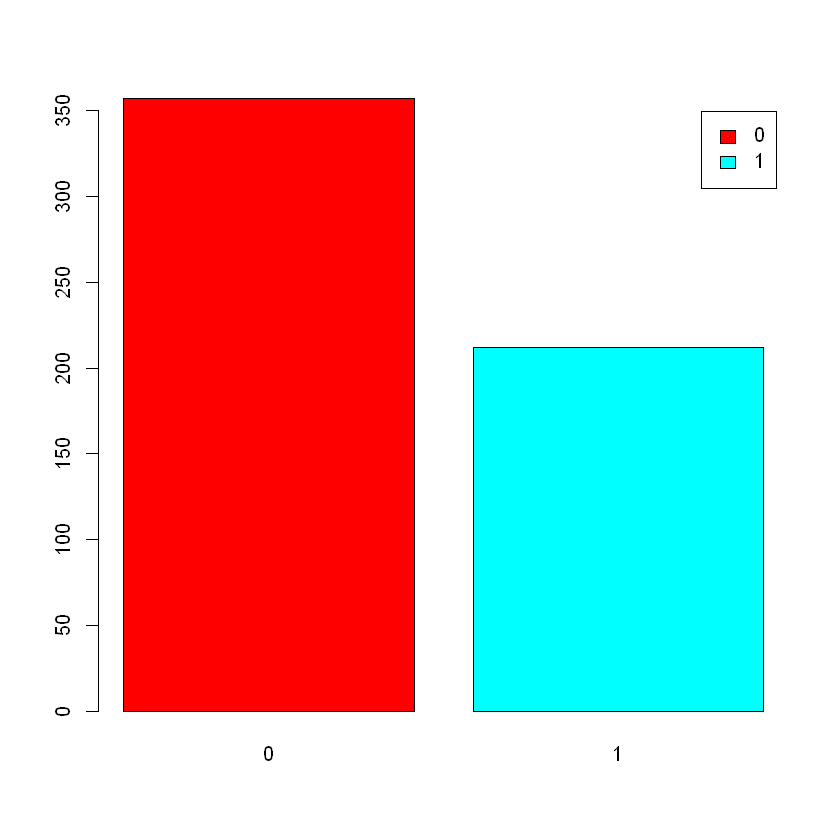

In [3]:
(tbl<-table(df$class))
barplot(tbl, beside=T, legend=T, col=rainbow(2))
#0 양성 , 1 음성

In [4]:
#언더샘플링
library(ROSE)
df_samp<-ovun.sample(class~ ., data=df, seed=1, method='under',
                    N=212*2)$data
table(df_samp$class)

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
212 212 

In [5]:
#오버샘플링
library(ROSE)
df_samp<-ovun.sample(class~ ., data=df, seed=1, method='over',
                    N=357*2)$data
table(df_samp$class)


  0   1 
357 357 

In [6]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$class,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-1]
y_train<-train[,1]
test<-df_samp[-idx_train,]
X_test<-test[,-1]
y_test<-test[,1]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


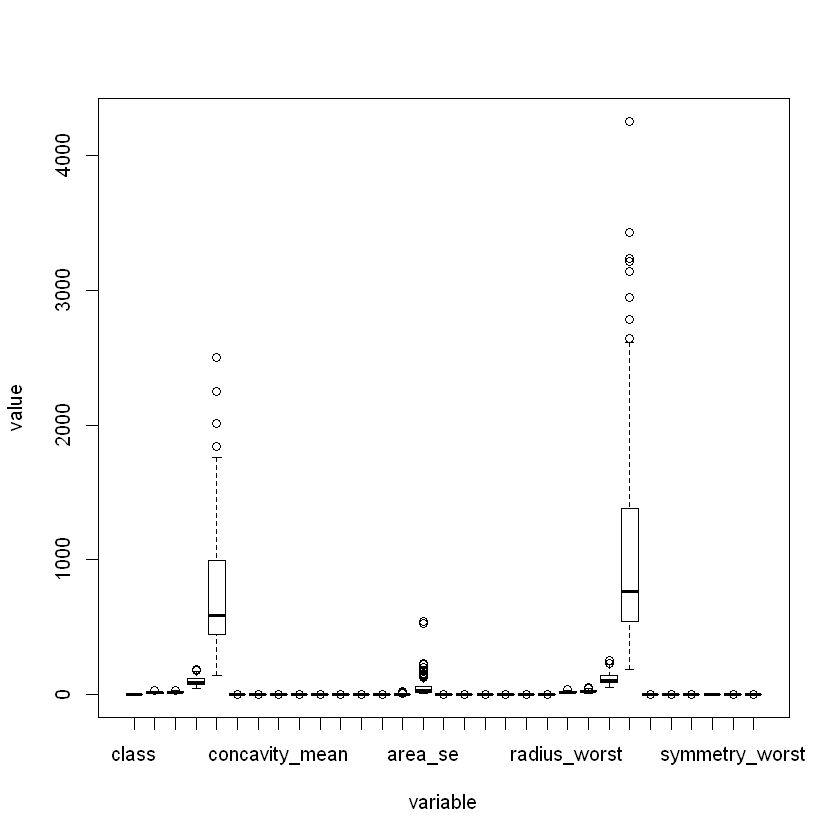

In [7]:
#스케일링 전의 박스플롯
library(reshape)
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [8]:
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
train_scaled<-cbind(X_train_scaled,class=y_train)
test_scaled<-cbind(X_test_scaled,class=y_test)

Using  as id variables


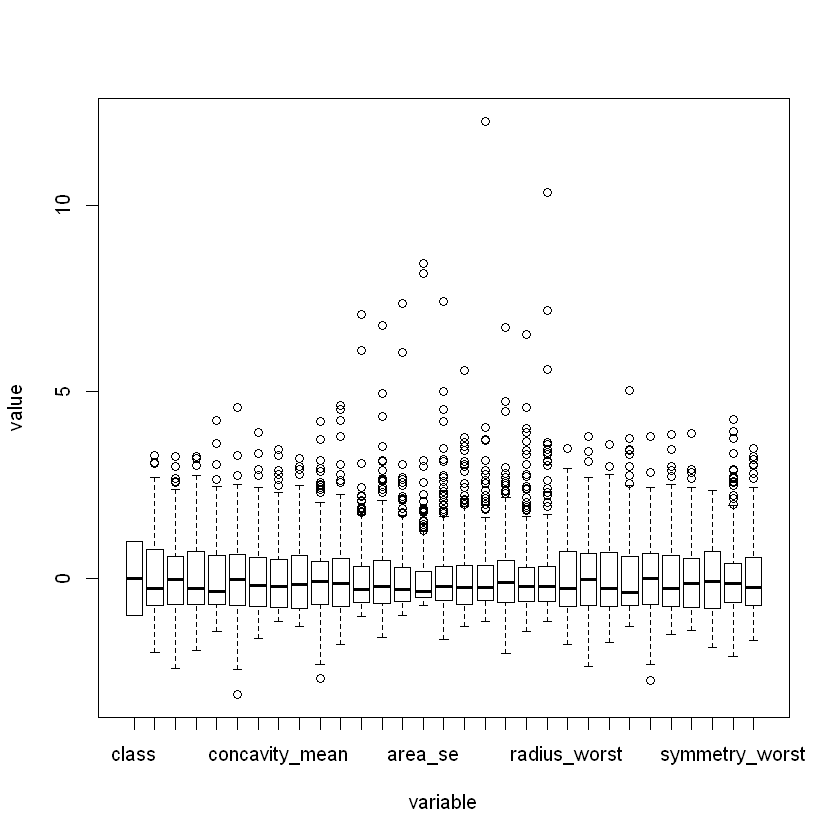

In [9]:
#스케일링 후의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [16]:
#로지스틱 회귀분석 모형으로 변수 선택
model<-glm(class~ . , data=train, family=binomial)
summary(model)

ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


In [17]:
reduced<-step(model,direction='backward')

Start:  AIC=64
class ~ diagnosis + radius_mean + texture_mean + perimeter_mean + 
    area_mean + smoothness_mean + compactness_mean + concavity_mean + 
    concave.points_mean + symmetry_mean + fractal_dimension_mean + 
    radius_se + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- radius_mean              1 3.3200e-09  62
- texture_mean             1 3.3200e-09  62
- perimeter_mean           1 3.3200e-09  62
- area_mean                1 3.3200e-09  62
- smoothness_mean          1 3.3200e-09  62
- compactness_mean         1 3.3200e-09  62
- concavity_mean           1 3.3200e-09  62
- concave.points_mean      1 3.3200e-09  62
- symmetry_mean            1 3.3200e-09  62
- fractal_dimension_mean   1 3.3200e-09  62
- radius_se                1 3.3200e-09  62
- texture_se               1 3.3200e-09  62
- perimeter_se             1 3.3200e-09  62
- area_se                  1 3.3200e-09  62
- smoothness_se            1 3.3200e-09  62
- compactness_se           1 3.3200e-09  62
- concavity_se             1 3.3200e-09  62
- concave.points_se        1 3.3200e-09  62
- symmetry_se              1 3.3200e-09  62
- fractal_dimension_se     1 3.3200e-09  62
- radius_worst             1 3.3200e-09  62
- texture_worst            1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=62
class ~ diagnosis + texture_mean + perimeter_mean + area_mean + 
    smoothness_mean + compactness_mean + concavity_mean + concave.points_mean + 
    symmetry_mean + fractal_dimension_mean + radius_se + texture_se + 
    perimeter_se + area_se + smoothness_se + compactness_se + 
    concavity_se + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- texture_mean             1 3.3200e-09  60
- perimeter_mean           1 3.3200e-09  60
- area_mean                1 3.3200e-09  60
- smoothness_mean          1 3.3200e-09  60
- compactness_mean         1 3.3200e-09  60
- concavity_mean           1 3.3200e-09  60
- concave.points_mean      1 3.3200e-09  60
- symmetry_mean            1 3.3200e-09  60
- fractal_dimension_mean   1 3.3200e-09  60
- radius_se                1 3.3200e-09  60
- texture_se               1 3.3200e-09  60
- perimeter_se             1 3.3200e-09  60
- area_se                  1 3.3200e-09  60
- smoothness_se            1 3.3200e-09  60
- compactness_se           1 3.3200e-09  60
- concavity_se             1 3.3200e-09  60
- concave.points_se        1 3.3200e-09  60
- symmetry_se              1 3.3200e-09  60
- fractal_dimension_se     1 3.3200e-09  60
- radius_worst             1 3.3200e-09  60
- texture_worst            1 3.3200e-09  60
- perimeter_worst          1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=60
class ~ diagnosis + perimeter_mean + area_mean + smoothness_mean + 
    compactness_mean + concavity_mean + concave.points_mean + 
    symmetry_mean + fractal_dimension_mean + radius_se + texture_se + 
    perimeter_se + area_se + smoothness_se + compactness_se + 
    concavity_se + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- perimeter_mean           1 3.3000e-09  58
- area_mean                1 3.3000e-09  58
- smoothness_mean          1 3.3000e-09  58
- compactness_mean         1 3.3000e-09  58
- concavity_mean           1 3.3000e-09  58
- concave.points_mean      1 3.3000e-09  58
- symmetry_mean            1 3.3000e-09  58
- fractal_dimension_mean   1 3.3000e-09  58
- radius_se                1 3.3000e-09  58
- texture_se               1 3.3000e-09  58
- perimeter_se             1 3.3000e-09  58
- area_se                  1 3.3000e-09  58
- smoothness_se            1 3.3000e-09  58
- compactness_se           1 3.3000e-09  58
- concavity_se             1 3.3000e-09  58
- concave.points_se        1 3.3000e-09  58
- symmetry_se              1 3.3000e-09  58
- fractal_dimension_se     1 3.3000e-09  58
- radius_worst             1 3.3000e-09  58
- texture_worst            1 3.3000e-09  58
- perimeter_worst          1 3.3000e-09  58
- area_worst               1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=58
class ~ diagnosis + area_mean + smoothness_mean + compactness_mean + 
    concavity_mean + concave.points_mean + symmetry_mean + fractal_dimension_mean + 
    radius_se + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- area_mean                1 3.3000e-09  56
- smoothness_mean          1 3.3000e-09  56
- compactness_mean         1 3.3000e-09  56
- concavity_mean           1 3.3000e-09  56
- concave.points_mean      1 3.3000e-09  56
- symmetry_mean            1 3.3000e-09  56
- fractal_dimension_mean   1 3.3000e-09  56
- radius_se                1 3.3000e-09  56
- texture_se               1 3.3000e-09  56
- perimeter_se             1 3.3000e-09  56
- area_se                  1 3.3000e-09  56
- smoothness_se            1 3.3000e-09  56
- compactness_se           1 3.3000e-09  56
- concavity_se             1 3.3000e-09  56
- concave.points_se        1 3.3000e-09  56
- symmetry_se              1 3.3000e-09  56
- fractal_dimension_se     1 3.3000e-09  56
- radius_worst             1 3.3000e-09  56
- texture_worst            1 3.3000e-09  56
- perimeter_worst          1 3.3000e-09  56
- area_worst               1 3.3000e-09  56
- smoothness_worst         1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=56
class ~ diagnosis + smoothness_mean + compactness_mean + concavity_mean + 
    concave.points_mean + symmetry_mean + fractal_dimension_mean + 
    radius_se + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df  Deviance AIC
- smoothness_mean          1 3.300e-09  54
- compactness_mean         1 3.300e-09  54
- concavity_mean           1 3.300e-09  54
- concave.points_mean      1 3.300e-09  54
- symmetry_mean            1 3.300e-09  54
- fractal_dimension_mean   1 3.300e-09  54
- radius_se                1 3.300e-09  54
- texture_se               1 3.300e-09  54
- perimeter_se             1 3.300e-09  54
- area_se                  1 3.300e-09  54
- smoothness_se            1 3.300e-09  54
- compactness_se           1 3.300e-09  54
- concavity_se             1 3.300e-09  54
- concave.points_se        1 3.300e-09  54
- symmetry_se              1 3.300e-09  54
- fractal_dimension_se     1 3.300e-09  54
- radius_worst             1 3.300e-09  54
- texture_worst            1 3.300e-09  54
- perimeter_worst          1 3.300e-09  54
- area_worst               1 3.300e-09  54
- smoothness_worst         1 3.300e-09  54
- compactness_worst        1 3.300e-09  54
- concavity

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=54
class ~ diagnosis + compactness_mean + concavity_mean + concave.points_mean + 
    symmetry_mean + fractal_dimension_mean + radius_se + texture_se + 
    perimeter_se + area_se + smoothness_se + compactness_se + 
    concavity_se + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- compactness_mean         1 3.3000e-09  52
- concavity_mean           1 3.3000e-09  52
- concave.points_mean      1 3.3000e-09  52
- symmetry_mean            1 3.3000e-09  52
- fractal_dimension_mean   1 3.3000e-09  52
- radius_se                1 3.3000e-09  52
- texture_se               1 3.3000e-09  52
- perimeter_se             1 3.3000e-09  52
- area_se                  1 3.3000e-09  52
- smoothness_se            1 3.3000e-09  52
- compactness_se           1 3.3000e-09  52
- concavity_se             1 3.3000e-09  52
- concave.points_se        1 3.3000e-09  52
- symmetry_se              1 3.3000e-09  52
- fractal_dimension_se     1 3.3000e-09  52
- radius_worst             1 3.3000e-09  52
- texture_worst            1 3.3000e-09  52
- perimeter_worst          1 3.3000e-09  52
- area_worst               1 3.3000e-09  52
- smoothness_worst         1 3.3000e-09  52
- compactness_worst        1 3.3000e-09  52
- concavity_worst          1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=52
class ~ diagnosis + concavity_mean + concave.points_mean + symmetry_mean + 
    fractal_dimension_mean + radius_se + texture_se + perimeter_se + 
    area_se + smoothness_se + compactness_se + concavity_se + 
    concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- concavity_mean           1      0.0   50.0
- concave.points_mean      1      0.0   50.0
- symmetry_mean            1      0.0   50.0
- fractal_dimension_mean   1      0.0   50.0
- radius_se                1      0.0   50.0
- texture_se               1      0.0   50.0
- perimeter_se             1      0.0   50.0
- area_se                  1      0.0   50.0
- smoothness_se            1      0.0   50.0
- compactness_se           1      0.0   50.0
- concavity_se             1      0.0   50.0
- concave.points_se        1      0.0   50.0
- symmetry_se              1      0.0   50.0
- fractal_dimension_se     1      0.0   50.0
- radius_worst             1      0.0   50.0
- texture_worst            1      0.0   50.0
- perimeter_worst          1      0.0   50.0
- area_worst               1      0.0   50.0
- smoothness_worst         1      0.0   50.0
- compactness_worst        1      0.0   50.0
- concavity_worst          1      0.0   50.0
- concave.

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=50
class ~ diagnosis + concave.points_mean + symmetry_mean + fractal_dimension_mean + 
    radius_se + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df   Deviance AIC
- concave.points_mean      1 3.3000e-09  48
- symmetry_mean            1 3.3000e-09  48
- fractal_dimension_mean   1 3.3000e-09  48
- radius_se                1 3.3000e-09  48
- texture_se               1 3.3000e-09  48
- perimeter_se             1 3.3000e-09  48
- area_se                  1 3.3000e-09  48
- smoothness_se            1 3.3000e-09  48
- compactness_se           1 3.3000e-09  48
- concavity_se             1 3.3000e-09  48
- concave.points_se        1 3.3000e-09  48
- symmetry_se              1 3.3000e-09  48
- fractal_dimension_se     1 3.3000e-09  48
- radius_worst             1 3.3000e-09  48
- texture_worst            1 3.3000e-09  48
- perimeter_worst          1 3.3000e-09  48
- area_worst               1 3.3000e-09  48
- smoothness_worst         1 3.3000e-09  48
- compactness_worst        1 3.3000e-09  48
- concavity_worst          1 3.3000e-09  48
- concave.points_worst     1 3.3000e-09  48
- symmetry_worst           1 3.3

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=48
class ~ diagnosis + symmetry_mean + fractal_dimension_mean + 
    radius_se + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- symmetry_mean            1    0.000 46.000
- fractal_dimension_mean   1    0.000 46.000
- radius_se                1    0.000 46.000
- texture_se               1    0.000 46.000
- perimeter_se             1    0.000 46.000
- area_se                  1    0.000 46.000
- smoothness_se            1    0.000 46.000
- compactness_se           1    0.000 46.000
- concavity_se             1    0.000 46.000
- concave.points_se        1    0.000 46.000
- symmetry_se              1    0.000 46.000
- fractal_dimension_se     1    0.000 46.000
- radius_worst             1    0.000 46.000
- texture_worst            1    0.000 46.000
- perimeter_worst          1    0.000 46.000
- area_worst               1    0.000 46.000
- smoothness_worst         1    0.000 46.000
- compactness_worst        1    0.000 46.000
- concavity_worst          1    0.000 46.000
- concave.points_worst     1    0.000 46.000
- symmetry_worst           1    0.000 46.000
- fractal_

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=46
class ~ diagnosis + fractal_dimension_mean + radius_se + texture_se + 
    perimeter_se + area_se + smoothness_se + compactness_se + 
    concavity_se + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- fractal_dimension_mean   1    0.000 44.000
- radius_se                1    0.000 44.000
- texture_se               1    0.000 44.000
- perimeter_se             1    0.000 44.000
- area_se                  1    0.000 44.000
- smoothness_se            1    0.000 44.000
- compactness_se           1    0.000 44.000
- concavity_se             1    0.000 44.000
- concave.points_se        1    0.000 44.000
- symmetry_se              1    0.000 44.000
- fractal_dimension_se     1    0.000 44.000
- radius_worst             1    0.000 44.000
- texture_worst            1    0.000 44.000
- perimeter_worst          1    0.000 44.000
- area_worst               1    0.000 44.000
- smoothness_worst         1    0.000 44.000
- compactness_worst        1    0.000 44.000
- concavity_worst          1    0.000 44.000
- concave.points_worst     1    0.000 44.000
- symmetry_worst           1    0.000 44.000
- fractal_dimension_worst  1    0.000 44.000
<none>    

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=44
class ~ diagnosis + radius_se + texture_se + perimeter_se + area_se + 
    smoothness_se + compactness_se + concavity_se + concave.points_se + 
    symmetry_se + fractal_dimension_se + radius_worst + texture_worst + 
    perimeter_worst + area_worst + smoothness_worst + compactness_worst + 
    concavity_worst + concave.points_worst + symmetry_worst + 
    fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- radius_se                1    0.000 42.000
- texture_se               1    0.000 42.000
- perimeter_se             1    0.000 42.000
- area_se                  1    0.000 42.000
- smoothness_se            1    0.000 42.000
- compactness_se           1    0.000 42.000
- concavity_se             1    0.000 42.000
- concave.points_se        1    0.000 42.000
- symmetry_se              1    0.000 42.000
- fractal_dimension_se     1    0.000 42.000
- radius_worst             1    0.000 42.000
- texture_worst            1    0.000 42.000
- perimeter_worst          1    0.000 42.000
- area_worst               1    0.000 42.000
- smoothness_worst         1    0.000 42.000
- compactness_worst        1    0.000 42.000
- concavity_worst          1    0.000 42.000
- concave.points_worst     1    0.000 42.000
- symmetry_worst           1    0.000 42.000
- fractal_dimension_worst  1    0.000 42.000
<none>                          0.000 44.000
- diagnosi

Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=42
class ~ diagnosis + texture_se + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- texture_se               1    0.000 40.000
- perimeter_se             1    0.000 40.000
- area_se                  1    0.000 40.000
- smoothness_se            1    0.000 40.000
- compactness_se           1    0.000 40.000
- concavity_se             1    0.000 40.000
- concave.points_se        1    0.000 40.000
- symmetry_se              1    0.000 40.000
- fractal_dimension_se     1    0.000 40.000
- radius_worst             1    0.000 40.000
- texture_worst            1    0.000 40.000
- perimeter_worst          1    0.000 40.000
- area_worst               1    0.000 40.000
- smoothness_worst         1    0.000 40.000
- compactness_worst        1    0.000 40.000
- concavity_worst          1    0.000 40.000
- concave.points_worst     1    0.000 40.000
- symmetry_worst           1    0.000 40.000
- fractal_dimension_worst  1    0.000 40.000
<none>                          0.000 42.000
- diagnosis                1   40.902 80.902


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=40
class ~ diagnosis + perimeter_se + area_se + smoothness_se + 
    compactness_se + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warnin

                          Df Deviance    AIC
- perimeter_se             1    0.000 38.000
- area_se                  1    0.000 38.000
- smoothness_se            1    0.000 38.000
- compactness_se           1    0.000 38.000
- concavity_se             1    0.000 38.000
- concave.points_se        1    0.000 38.000
- symmetry_se              1    0.000 38.000
- fractal_dimension_se     1    0.000 38.000
- radius_worst             1    0.000 38.000
- texture_worst            1    0.000 38.000
- perimeter_worst          1    0.000 38.000
- area_worst               1    0.000 38.000
- smoothness_worst         1    0.000 38.000
- compactness_worst        1    0.000 38.000
- concavity_worst          1    0.000 38.000
- concave.points_worst     1    0.000 38.000
- symmetry_worst           1    0.000 38.000
- fractal_dimension_worst  1    0.000 38.000
<none>                          0.000 40.000
- diagnosis                1   46.389 84.389


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=38
class ~ diagnosis + area_se + smoothness_se + compactness_se + 
    concavity_se + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance   AIC
- area_se                  1     0.00 36.00
- smoothness_se            1     0.00 36.00
- compactness_se           1     0.00 36.00
- concavity_se             1     0.00 36.00
- concave.points_se        1     0.00 36.00
- symmetry_se              1     0.00 36.00
- fractal_dimension_se     1     0.00 36.00
- radius_worst             1     0.00 36.00
- texture_worst            1     0.00 36.00
- perimeter_worst          1     0.00 36.00
- area_worst               1     0.00 36.00
- smoothness_worst         1     0.00 36.00
- compactness_worst        1     0.00 36.00
- concavity_worst          1     0.00 36.00
- concave.points_worst     1     0.00 36.00
- symmetry_worst           1     0.00 36.00
- fractal_dimension_worst  1     0.00 36.00
<none>                           0.00 38.00
- diagnosis                1    46.94 82.94


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=36
class ~ diagnosis + smoothness_se + compactness_se + concavity_se + 
    concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- smoothness_se            1    0.000 34.000
- compactness_se           1    0.000 34.000
- concavity_se             1    0.000 34.000
- concave.points_se        1    0.000 34.000
- symmetry_se              1    0.000 34.000
- fractal_dimension_se     1    0.000 34.000
- radius_worst             1    0.000 34.000
- texture_worst            1    0.000 34.000
- perimeter_worst          1    0.000 34.000
- area_worst               1    0.000 34.000
- smoothness_worst         1    0.000 34.000
- compactness_worst        1    0.000 34.000
- concavity_worst          1    0.000 34.000
- concave.points_worst     1    0.000 34.000
- symmetry_worst           1    0.000 34.000
- fractal_dimension_worst  1    0.000 34.000
<none>                          0.000 36.000
- diagnosis                1   59.805 93.805


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=34
class ~ diagnosis + compactness_se + concavity_se + concave.points_se + 
    symmetry_se + fractal_dimension_se + radius_worst + texture_worst + 
    perimeter_worst + area_worst + smoothness_worst + compactness_worst + 
    concavity_worst + concave.points_worst + symmetry_worst + 
    fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- compactness_se           1    0.000 32.000
- concavity_se             1    0.000 32.000
- concave.points_se        1    0.000 32.000
- symmetry_se              1    0.000 32.000
- fractal_dimension_se     1    0.000 32.000
- radius_worst             1    0.000 32.000
- texture_worst            1    0.000 32.000
- perimeter_worst          1    0.000 32.000
- area_worst               1    0.000 32.000
- smoothness_worst         1    0.000 32.000
- compactness_worst        1    0.000 32.000
- concavity_worst          1    0.000 32.000
- concave.points_worst     1    0.000 32.000
- symmetry_worst           1    0.000 32.000
- fractal_dimension_worst  1    0.000 32.000
<none>                          0.000 34.000
- diagnosis                1   60.771 92.771


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=32
class ~ diagnosis + concavity_se + concave.points_se + symmetry_se + 
    fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- concavity_se             1    0.000 30.000
- concave.points_se        1    0.000 30.000
- symmetry_se              1    0.000 30.000
- fractal_dimension_se     1    0.000 30.000
- radius_worst             1    0.000 30.000
- texture_worst            1    0.000 30.000
- perimeter_worst          1    0.000 30.000
- area_worst               1    0.000 30.000
- smoothness_worst         1    0.000 30.000
- compactness_worst        1    0.000 30.000
- concavity_worst          1    0.000 30.000
- concave.points_worst     1    0.000 30.000
- symmetry_worst           1    0.000 30.000
- fractal_dimension_worst  1    0.000 30.000
<none>                          0.000 32.000
- diagnosis                1   60.947 90.947


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=30
class ~ diagnosis + concave.points_se + symmetry_se + fractal_dimension_se + 
    radius_worst + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- concave.points_se        1    0.000 28.000
- symmetry_se              1    0.000 28.000
- fractal_dimension_se     1    0.000 28.000
- radius_worst             1    0.000 28.000
- texture_worst            1    0.000 28.000
- perimeter_worst          1    0.000 28.000
- area_worst               1    0.000 28.000
- smoothness_worst         1    0.000 28.000
- compactness_worst        1    0.000 28.000
- concavity_worst          1    0.000 28.000
- concave.points_worst     1    0.000 28.000
- symmetry_worst           1    0.000 28.000
- fractal_dimension_worst  1    0.000 28.000
<none>                          0.000 30.000
- diagnosis                1   61.419 89.419


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=28
class ~ diagnosis + symmetry_se + fractal_dimension_se + radius_worst + 
    texture_worst + perimeter_worst + area_worst + smoothness_worst + 
    compactness_worst + concavity_worst + concave.points_worst + 
    symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- symmetry_se              1    0.000  26.00
- fractal_dimension_se     1    0.000  26.00
- radius_worst             1    0.000  26.00
- texture_worst            1    0.000  26.00
- perimeter_worst          1    0.000  26.00
- area_worst               1    0.000  26.00
- smoothness_worst         1    0.000  26.00
- compactness_worst        1    0.000  26.00
- concavity_worst          1    0.000  26.00
- concave.points_worst     1    0.000  26.00
- symmetry_worst           1    0.000  26.00
- fractal_dimension_worst  1    0.000  26.00
<none>                          0.000  28.00
- diagnosis                1   86.478 112.48


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=26
class ~ diagnosis + fractal_dimension_se + radius_worst + texture_worst + 
    perimeter_worst + area_worst + smoothness_worst + compactness_worst + 
    concavity_worst + concave.points_worst + symmetry_worst + 
    fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- fractal_dimension_se     1    0.000  24.00
- radius_worst             1    0.000  24.00
- texture_worst            1    0.000  24.00
- perimeter_worst          1    0.000  24.00
- area_worst               1    0.000  24.00
- smoothness_worst         1    0.000  24.00
- compactness_worst        1    0.000  24.00
- concavity_worst          1    0.000  24.00
- concave.points_worst     1    0.000  24.00
- symmetry_worst           1    0.000  24.00
- fractal_dimension_worst  1    0.000  24.00
<none>                          0.000  26.00
- diagnosis                1   88.094 112.09


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=24
class ~ diagnosis + radius_worst + texture_worst + perimeter_worst + 
    area_worst + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- radius_worst             1    0.000  22.00
- texture_worst            1    0.000  22.00
- perimeter_worst          1    0.000  22.00
- area_worst               1    0.000  22.00
- smoothness_worst         1    0.000  22.00
- compactness_worst        1    0.000  22.00
- concavity_worst          1    0.000  22.00
- concave.points_worst     1    0.000  22.00
- symmetry_worst           1    0.000  22.00
- fractal_dimension_worst  1    0.000  22.00
<none>                          0.000  24.00
- diagnosis                1   88.642 110.64


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=22
class ~ diagnosis + texture_worst + perimeter_worst + area_worst + 
    smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- texture_worst            1    0.000  20.00
- perimeter_worst          1    0.000  20.00
- area_worst               1    0.000  20.00
- smoothness_worst         1    0.000  20.00
- compactness_worst        1    0.000  20.00
- concavity_worst          1    0.000  20.00
- concave.points_worst     1    0.000  20.00
- symmetry_worst           1    0.000  20.00
- fractal_dimension_worst  1    0.000  20.00
<none>                          0.000  22.00
- diagnosis                1   88.645 108.64


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=20
class ~ diagnosis + perimeter_worst + area_worst + smoothness_worst + 
    compactness_worst + concavity_worst + concave.points_worst + 
    symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- perimeter_worst          1     0.00  18.00
- area_worst               1     0.00  18.00
- smoothness_worst         1     0.00  18.00
- compactness_worst        1     0.00  18.00
- concavity_worst          1     0.00  18.00
- concave.points_worst     1     0.00  18.00
- symmetry_worst           1     0.00  18.00
- fractal_dimension_worst  1     0.00  18.00
<none>                           0.00  20.00
- diagnosis                1   121.95 139.95


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=18
class ~ diagnosis + area_worst + smoothness_worst + compactness_worst + 
    concavity_worst + concave.points_worst + symmetry_worst + 
    fractal_dimension_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- area_worst               1     0.00  16.00
- smoothness_worst         1     0.00  16.00
- compactness_worst        1     0.00  16.00
- concavity_worst          1     0.00  16.00
- concave.points_worst     1     0.00  16.00
- symmetry_worst           1     0.00  16.00
- fractal_dimension_worst  1     0.00  16.00
<none>                           0.00  18.00
- diagnosis                1   123.09 139.09


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=16
class ~ diagnosis + smoothness_worst + compactness_worst + concavity_worst + 
    concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- smoothness_worst         1     0.00  14.00
- compactness_worst        1     0.00  14.00
- concavity_worst          1     0.00  14.00
- concave.points_worst     1     0.00  14.00
- symmetry_worst           1     0.00  14.00
- fractal_dimension_worst  1     0.00  14.00
<none>                           0.00  16.00
- diagnosis                1   207.14 221.14


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=14
class ~ diagnosis + compactness_worst + concavity_worst + concave.points_worst + 
    symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- compactness_worst        1     0.00  12.00
- concavity_worst          1     0.00  12.00
- concave.points_worst     1     0.00  12.00
- symmetry_worst           1     0.00  12.00
- fractal_dimension_worst  1     0.00  12.00
<none>                           0.00  14.00
- diagnosis                1   207.24 219.24


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=12
class ~ diagnosis + concavity_worst + concave.points_worst + 
    symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- concavity_worst          1     0.00  10.00
- concave.points_worst     1     0.00  10.00
- symmetry_worst           1     0.00  10.00
- fractal_dimension_worst  1     0.00  10.00
<none>                           0.00  12.00
- diagnosis                1   207.27 217.27


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=10
class ~ diagnosis + concave.points_worst + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- concave.points_worst     1     0.00   8.00
- symmetry_worst           1     0.00   8.00
- fractal_dimension_worst  1     0.00   8.00
<none>                           0.00  10.00
- diagnosis                1   212.26 220.26


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=8
class ~ diagnosis + symmetry_worst + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance    AIC
- symmetry_worst           1     0.00   6.00
- fractal_dimension_worst  1     0.00   6.00
<none>                           0.00   8.00
- diagnosis                1   662.93 668.93


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=6
class ~ diagnosis + fractal_dimension_worst



Warning message:
"glm.fit: algorithm did not converge"

                          Df Deviance   AIC
- fractal_dimension_worst  1      0.0   4.0
<none>                            0.0   6.0
- diagnosis                1    735.4 739.4


Warning message:
"glm.fit: algorithm did not converge"


Step:  AIC=4
class ~ diagnosis

            Df Deviance    AIC
<none>             0.00   4.00
- diagnosis  1   792.96 794.96


In [18]:
#svm 모형
library(e1071)
set.seed(123)
tune.out<-tune(svm, class ~. ,data=train_scaled,
               range=list(cost=c(0.001,0.01,0.1,1,10),
                          gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.1274275 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-03 1e-04 1.9155297 0.34153147
2  1e-02 1e-04 1.8674916 0.32941004
3  1e-01 1e-04 1.4315346 0.22909835
4  1e+00 1e-04 0.4096879 0.05686958
5  1e+01 1e-04 0.2914513 0.05983261
6  1e-03 1e-03 1.8728172 0.33078106
7  1e-02 1e-03 1.4757983 0.23785198
8  1e-01 1e-03 0.3947108 0.05368449
9  1e+00 1e-03 0.2634206 0.05693184
10 1e+01 1e-03 0.2142809 0.05976821
11 1e-03 1e-02 1.6951287 0.28874904
12 1e-02 1e-02 0.4405683 0.05314506
13 1e-01 1e-02 0.2184944 0.05944775
14 1e+00 1e-02 0.1673344 0.05876854
15 1e+01 1e-02 0.1350076 0.05051871
16 1e-03 1e-01 1.7807430 0.31137577
17 1e-02 1e-01 0.8246192 0.12469557
18 1e-01 1e-01 0.2399329 0.06264034
19 1e+00 1e-01 0.1274275 0.04815712
20 1e+01 1e-01 0.1302346 0.06022986


In [19]:
bestmodel<-tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = class ~ ., data = train_scaled, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 10), gamma = c(1e-04, 
        0.001, 0.01, 0.1)))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  319






In [20]:
#학습용 데이터셋의 예측 정확도
pred<-predict(bestmodel,X_train_scaled)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train  -1   0   1
      B 278   8   0
      M   3  10 273

[1] 0

In [21]:
#검증용 데이터셋의 예측 정확도
pred<-predict(bestmodel,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test -1  0  1
     B 59 12  0
     M  0 11 60

[1] 0